In [1]:
import pandas as pd
import numpy as np
import random
# Importing dataset
df = pd.read_csv('Folds5x2_pp.xlsx')
print(df.head())
print(df.info())

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB
None


In [2]:
def get_list_of_rows(df):
    list_of_rows  = []

    for index, rows in df.iterrows(): 
        my_list =[rows.AT, rows.V, rows.AP, rows.RH, rows.PE] 
        list_of_rows.append(my_list) 
        
    return(list_of_rows)

In [3]:
def calculate_variance(column):
    
    variance = 0
    if len(column) == 0:
        return 100
    
    mean = sum(column) / len(column)
    
    for value in column:
        variance += (value - mean)**2
        
    variance = variance / len(column)
    return variance


In [4]:
def calculate_variance_gain(left, right, current_variance):
    
    p = float(len(left)) / (len(left) + len(right))
    return current_variance - p * calculate_variance(left) - (1 - p) * calculate_variance(right)
    
    return variance


In [5]:
def find_best_split(df):
    
    list_of_rows = get_list_of_rows(df)
    
    current_variance = calculate_variance([row[-1] for row in list_of_rows])
    
    left = []
    right = []
    best_split = {}
    maximum = 0
    n_features = len(list_of_rows[0]) - 1
    
    #Iterate over every feature except the last one that is the target
    for col in range(n_features):
        random_indexes = [random.randint(0, len(list_of_rows)) for _ in range(50)]
        for index in random_indexes:
            left = [row for row in list_of_rows if row[col] > list_of_rows[index][col]] #Add rows where condition is true
            right = [row for row in list_of_rows if row[col] <= list_of_rows[index][col]] #Add rows where condition is false
            variance_gain = calculate_variance_gain([row[-1] for row in left], [row[-1] for row in right], current_variance)
            
                        
            best_split[variance_gain] = [left, right]
            
            if maximum < variance_gain:
                feature = df.columns[col]
                value = list_of_rows[index][col]
                maximum = variance_gain
                
    return best_split[max(best_split.keys())], feature, value, max(best_split.keys())

# find_best_split(df)

In [6]:
def build_stump(df):
    
    stump = {}
    best_split, feature, value, max_gini = find_best_split(df)
    stump[feature + '>' + str(value)] = [best_split[0], best_split[1]]
    
    return stump
    


In [7]:
def predict(rows, stump):
    
    #stump node is a string like 'RH>96.62'
    stump_node = list(stump.keys())[0]
    stump_node = stump_node.split('>')
    feature = stump_node[0]
    value = stump_node[1]
    y_pred = []
    
    feature_to_num = lambda feature: list(df.columns).index(feature)
    
    #left and right are the values depending on the question of the node
    left = stump[list(stump.keys())[0]][0]
    right = stump[list(stump.keys())[0]][1]
    
    
    left_y_pred_acc = [row[-1] for row in left]
    left_y_pred_acc = sum(left_y_pred_acc)
    if len(left) <= 0:
        left_y_pred = 0
    else:
        left_y_pred = left_y_pred_acc / len(left)
    
    i = 0
    j=0
    right_y_pred_acc = [row[-1] for row in right]
    right_y_pred_acc = sum(right_y_pred_acc)
    if len(right) <= 0:
        right_y_pred = 0
    else:
        right_y_pred = right_y_pred_acc /len(right)
    for row in rows:
        if row[feature_to_num(feature)] > float(value):
            y_pred.append(left_y_pred)
            i+=1
        else:
            y_pred.append(right_y_pred)
            j+=1
    
    print(len(left))
    print(i)
    print('----')
    print(len(right))
    print(j)
    return y_pred
    
    

In [11]:
def calculate_mse(original, predicted):
    mse = np.sum((original - predicted)**2)/len(original)
    return mse

5659
5659
----
3909
3909
mse81.3180777403147
r20.7207980969810137
2526
2526
----
7042
7042
mse65.81717222950083
r20.7740197475340138
8512
8512
----
1056
1056
mse57.4257762145641
r20.8028312221957513
5641
5641
----
3927
3927
mse47.823599311955654
r20.8357998576927033
2914
2914
----
6654
6654
mse41.94048154784904
r20.8559992736290816
7788
7788
----
1780
1780
mse40.016781528894235
r20.8626042097153114
5765
5765
----
3803
3803
mse36.25751444647608
r20.8755114814134891
7180
7180
----
2388
2388
mse34.46285289026159
r20.881673369836015
5622
5622
----
3946
3946
mse33.17239837934004
r20.8861040864149203
4193
4193
----
5375
5375
mse31.526199909357107
r20.8917562336168495
5644
5644
----
3924
3924
mse30.537263221792028
r20.8951517025310953
5901
5901
----
3667
3667
mse29.320896138921363
r20.8993280433121904
5720
5720
----
3848
3848
mse28.697831025944133
r20.9014673088984174
6957
6957
----
2611
2611
mse28.137609767694904
r20.9033908029819148
9150
9150
----
418
418
mse27.614702428449323
r20.905186181

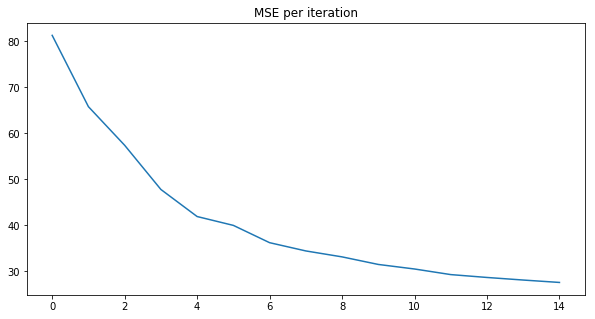

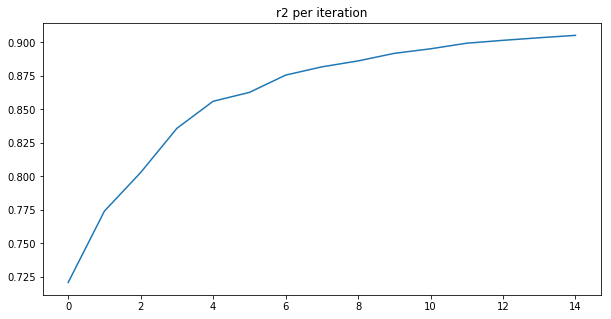

In [12]:
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

def boosting(rows):
    iters = 15
    y = [row[-1] for row in rows]
    x = [row[:-1]for row in rows]
    y_pred = [0 for _ in y]
    
    stumps = []
    y = np.array(y)
    x = np.array(x)
    y_pred = np.array(y_pred)
    mse_list = []
    r2_list = []
    for i in range(iters):
        e_i = y - y_pred
        x_ei = np.hstack((x,e_i.reshape(len(e_i), 1)))
        stump = build_stump(pd.DataFrame(x_ei.tolist(), columns = list(df.columns)))
        
        stumps.append(stump)
        
        y_pred = predict(rows, stump) + y_pred
        mse = calculate_mse(y, np.array(y_pred.reshape(len(y_pred))))
        mse_list.append(mse)
        r2 = r2_score(y, np.array(y_pred.reshape(len(y_pred))) )
        r2_list.append(r2)
        print('mse' + str(mse))
        print('r2' + str(r2))
    return iters, mse_list, r2_list

rows = get_list_of_rows(df)
iters, mse_list, r2_list = boosting(rows)
plt.figure(figsize=(10, 5))
plt.title('MSE per iteration')
plt.plot(range(iters), mse_list)
plt.show()
plt.figure(figsize=(10, 5))
plt.title('r2 per iteration')
plt.plot(range(iters), r2_list)
plt.show()

In [25]:
# iters = 5
# stumps = []
# rows = get_list_of_rows(df)

# for i in range(iters):
#     stump = build_stump(df)
#     y_pred = predict


# stump = build_stump(df)
# print(predict(get_list_of_rows(df), stump))